In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('survey-results-public.csv')
df.head(5)


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
2. # Check the number of rows and coloumns 
num_rows = df.shape[0]
num_cols = df.shape[1]
print("The Number of rows:",num_rows,"\nThe number of cols:",num_cols)


The Number of rows: 51392 
The number of cols: 154


In [6]:
# Select relevant columns
columns_question_3 = ['CareerSatisfaction', 'DiversityImportant']

In [7]:
nulls_CareerSatisfaction = df['CareerSatisfaction'].isnull().sum()/df.shape[0]
nulls_Diversity_Important = df['DiversityImportant'].isnull().sum()/df.shape[0]


print(f'Nulls in DiversityImportant: {nulls_Diversity_Important}')
print(f'Nulls in CareerSatisfaction: {nulls_CareerSatisfaction}')


Nulls in DiversityImportant: 0.3986807285180573
Nulls in CareerSatisfaction: 0.16922867372353673


In [8]:
# Subset the DataFrame with relevant columns and drop rows with missing values
df_question_3 = df[columns_question_3].dropna()

In [9]:
# Convert 'DiversityImportant' column to numerical values for correlation analysis
df_question_3['DiversityImportant'] = df_question_3['DiversityImportant'].map({'Agree': 1, 'Strongly agree': 1, 'Somewhat agree': 1,
                                                                                 'Disagree': 0, 'Strongly disagree': 0})

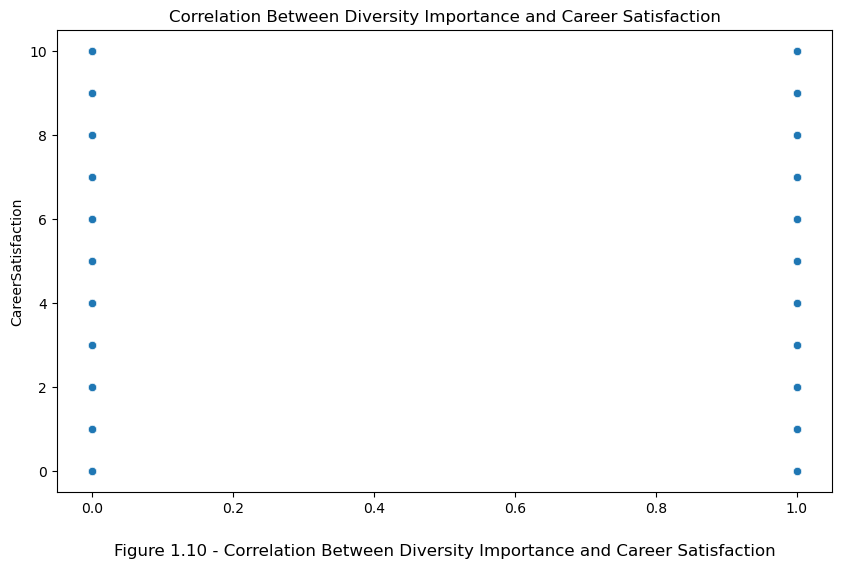

In [10]:
# Visualize correlation using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DiversityImportant', y='CareerSatisfaction', data=df_question_3)
plt.title('Correlation Between Diversity Importance and Career Satisfaction')

# Set the x-axis label with the Figure number
plt.xlabel('Figure 1.10 - Correlation Between Diversity Importance and Career Satisfaction', fontsize=12, labelpad=20)
        
plt.show()

In [12]:
# Calculate correlation coefficient
correlation_coefficient = df_question_3['DiversityImportant'].corr(df_question_3['CareerSatisfaction'])
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.028024175426191074
